In [1]:
from gensim.models.doc2vec import Doc2Vec
from operator import itemgetter
from collections import Counter
from itertools import groupby
import pandas as pd
import numpy as np
import gensim                                                  
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math

### Doc2vec

In [2]:
model_d2v = Doc2Vec.load('./modeloDoc2vec_setembro_premas40')
labels_d2v = list(model_d2v.docvecs.doctags.keys())
indices=['Alva','Bols','Ciro','Gera','Guil','Henr','Joao','Mari']
selecs=[]
for i in labels_d2v:
    if i[0:4] in indices:
        selecs.append(i)
labels_d2v=selecs

## TF-IDF

In [3]:
df=pd.read_pickle('/home/kid/Documentos/analisis2018/pandas_data_candidatos_premas.pd')

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(use_idf=True, norm=None, ngram_range=(1, 1)) 
#X = tfidf.fit_transform(te)
matrix = tfidf.fit_transform(df.Text_clean).toarray()
labels_tfidf=list(df.abreviatura)
vectors_tfidf=list(matrix)
lt=[]
vt=[]
for i,j in zip(labels_tfidf,vectors_tfidf):
    if i[0:4] in indices:
        lt.append(i)
        vt.append(j)
labels_tfidf=lt
vectors_tfidf=vt

In [5]:
matriz_tfidf=np.asarray(vectors_tfidf) #conver in matriz
matriz_tfidf.shape

(753, 55788)

In [6]:
index = gensim.similarities.MatrixSimilarity(gensim.matutils.Dense2Corpus(matriz_tfidf.T))
similarity_matrix_tfidf = []
for sims in index:
    similarity_matrix_tfidf.append(sims)
similarity_matrix_tfidf = np.array(similarity_matrix_tfidf)
len(similarity_matrix_tfidf[0])

/usr/local/lib/python3.5/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


753

In [7]:
def most_simi(doc,num=10):
    pos=labels_tfidf.index(doc)
    simis=list(similarity_matrix_tfidf[pos][:])
    zipsimi=list(zip(labels_tfidf,simis))
    zipsimi.sort(key=lambda x: x[1],reverse=True)
    return zipsimi[1:num+1]

In [8]:
def most_simi_can(doc1,doc2):
    pos1=labels_tfidf.index(doc1)
    pos2=labels_tfidf.index(doc2)
    return similarity_matrix_tfidf[pos1][pos2]

# -------------------------------------------------------------------------------------------------------------

In [10]:
def strongs(labels,model,minsimi,tipo):
    final_strongs=[]
    nomes=[]
    for t in labels:
        nomes.append(t[0:4])
    ct=Counter(nomes)
    listoTodo = sorted(labels, key=itemgetter(0,1,2))
    ll_candidatos = [list(value) for key, value in groupby(listoTodo, lambda x: x[0:4])]
    #print(ll_candidatos)
    not_repeat=[]
    test=[]
    for i in range(len(ll_candidatos)): #recorre lista grande
        for j in ll_candidatos[i]: #sacas el principal
            for k in range(i+1,len(ll_candidatos)): # las restantes listas de listas 
                for l in ll_candidatos[k]: # elementos de los subgrupos
                    if tipo==1:
                        similarity=most_simi_can(j,l)
                    else:
                        similarity=model.docvecs.similarity(j,l)
                    if similarity>=minsimi:
                        test.append(j)
                        test.append(l)
                        #print(j,l)
                        #nomes.append(j[0:8]+', '+l[0:8])
                        final_strongs.append((j,l,similarity))
            #print('--------------------------------------------------------------------------------------------------')
    final_strongs=sorted(final_strongs, key=lambda x: x[2],reverse=True)
    return final_strongs

In [11]:
def names(list_par):
    mes_en=['September','October','November','December','January','February','March','April','May','June','July','August','September']
    mes_pt=['ant','out','nov', 'dez', 'jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago','set']
    indices=['Alva','Bols','Ciro','Gera','Guil','Henr','Joao','Mari']
    colors=['#9C661F','r','b','#7FFF00','#FFB90F','violet','aqua','black']
    combi=[]
    nombs=[]
    for x in list_par:
        if x[0][:4] in indices and x[1][:4] in indices:
            mes_name0=mes_en[mes_pt.index(x[0][5:8])][:3]
            mes_name1=mes_en[mes_pt.index(x[1][5:8])][:3]
            #print(x[0][5:8],mes_en[mes_pt.index(x[0][5:8])][:3])
            combi.append((colors[(indices.index(x[0][:4]))],colors[(indices.index(x[1][:4]))]))
            #x[0][5:8]=mes_name0
            #x[1][5:8]=mes_name1
            a=x[0][0:5]+mes_name0
            b=x[1][0:5]+mes_name1
            nombs.append(a+', '+b)
    return combi, nombs

In [12]:
print(labels_tfidf[:2])
print(labels_d2v[:2])

['Guil_jan_2', 'Guil_jan_3']
['Alva_jun_14', 'Guil_jul_9']


In [13]:
#ss, nombs=strongs(labels_d2v,model_d2v,0.6)
list_par=strongs(labels_tfidf,model_d2v,0.35,1)

In [23]:
list_par2=strongs(labels_d2v,model_d2v,0.6,2)

/usr/local/lib/python3.5/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [24]:
list_par2

[('Ciro_jun_8', 'Guil_mai_14', 0.73728955),
 ('Alva_abr_15', 'Henr_nov_2', 0.69093204),
 ('Alva_abr_15', 'Guil_mar_5', 0.6562288),
 ('Guil_mai_6', 'Joao_mar_4', 0.6556229),
 ('Ciro_jun_8', 'Henr_nov_2', 0.6504773),
 ('Alva_abr_15', 'Ciro_jun_8', 0.63688433),
 ('Alva_jan_2', 'Guil_fev_3', 0.63229626),
 ('Guil_ago_13', 'Joao_ago_10', 0.628788),
 ('Alva_abr_15', 'Guil_mai_14', 0.6193976),
 ('Bols_mai_9', 'Guil_mai_14', 0.6179192),
 ('Guil_mai_14', 'Henr_nov_2', 0.61724025),
 ('Henr_ago_1', 'Mari_ago_3', 0.6148591),
 ('Gera_mai_3', 'Henr_ago_4', 0.6113782),
 ('Gera_jun_7', 'Mari_jun_11', 0.6084893),
 ('Bols_mai_6', 'Gera_mai_3', 0.6045597),
 ('Alva_dez_2', 'Gera_ant_3', 0.6039846),
 ('Ciro_jun_8', 'Joao_mai_6', 0.60043365),
 ('Ciro_dez_8', 'Henr_nov_1', 0.60040146)]

In [14]:
list_par

[('Alva_mai_5', 'Ciro_mai_4', 0.43423378),
 ('Alva_mai_5', 'Gera_mai_1', 0.41108805),
 ('Alva_jun_9', 'Guil_mai_6', 0.40153122),
 ('Alva_mai_5', 'Mari_mai_3', 0.39553216),
 ('Alva_mai_5', 'Gera_jun_6', 0.38924608),
 ('Guil_ago_13', 'Joao_ago_10', 0.3889293),
 ('Guil_mai_6', 'Joao_mar_4', 0.386061),
 ('Alva_mai_5', 'Henr_mai_4', 0.38335273),
 ('Henr_set_6', 'Joao_ago_9', 0.3774339),
 ('Gera_mai_1', 'Henr_mai_4', 0.37056988),
 ('Alva_mai_5', 'Bols_mai_5', 0.3664909),
 ('Henr_ago_1', 'Joao_ago_8', 0.36474133),
 ('Guil_ago_1', 'Mari_ago_3', 0.36364147),
 ('Ciro_set_2', 'Gera_ago_7', 0.3613831),
 ('Guil_ago_13', 'Henr_ago_5', 0.3598764),
 ('Joao_ago_9', 'Mari_ago_4', 0.35790604),
 ('Henr_mai_4', 'Mari_mai_3', 0.35429937),
 ('Gera_ago_7', 'Joao_ago_9', 0.35330188)]

In [15]:
colrs,names=names(list_par)

## plot

8


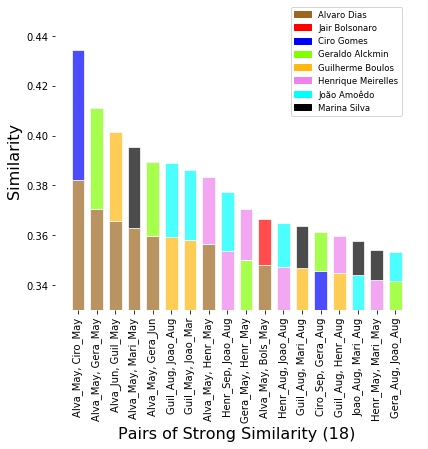

In [16]:
import matplotlib.patches as mpatches
cads=['Alvaro Dias','Jair Bolsonaro','Ciro Gomes','Geraldo Alckmin','Guilherme Boulos','Henrique Meirelles','João Amoêdo','Marina Silva']
mc=['#9C661F','r','b','#7FFF00','#FFB90F','violet','aqua','black']

junto=[]
for candi, color in zip(cads,mc):
    junto.append(mpatches.Patch(color=color, label=candi))
print(len(junto))

par1=[]
par2=[]
pos=len(list_par)
i=0
iss=[]
fig, ax = plt.subplots(figsize=(6.5,5.5))
xmin=0.33
for t,y in zip(list_par, colrs):
    falta=xmin-t[2]/2
    complemento=t[2]-xmin
    #print(var)
    iss.append(i)
    #print('kid',t[2]/2+var)
    p1=t[2]/2+falta+complemento/2
    p2=complemento/2
    #print('p1: ',p1,p2)
    par1.append(p1)
    par2.append(p2)
    #print(par1,par2)
    plt.bar(i,par1,color=y[0],edgecolor='white',alpha=0.70)
    plt.bar(i,par2,color=y[1],edgecolor='white',bottom=par1,alpha=0.70)
    par1=[]
    par2=[]
    i=i+1.2
    
plt.xticks(iss, names, rotation=90)#rotation=90
#plt.yticks(rotation=90)
plt.xlabel('Pairs of Strong Similarity ('+str(len(list_par))+')', fontsize=16 )#rotation=180
plt.ylabel('Similarity', fontsize=16)
#ax.invert_yaxis() 
#plt.title('Stacked Barchart - Happiness index across cities',fontsize=18)
#plt.legend(indices,loc=4)
#plt.legend(handles=junto,fontsize=8.5,loc=(0.65, 0.65))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ss=[xmin,0.45]
ax.set_ylim(ss)
plt.legend(handles=junto,fontsize=8.5,loc=(0.65, 0.65))
plt.show()

# tamaños doc

In [17]:
colorCod=['#9ACD32', '#808000','#ae7181', '#cb416b']
xs=['Pair-1','Pair-2','Pair-3','Pair-4','Pair-5','Pair-6','Pair-7','Pair-8','Pair-9','Pair-10','Pair-11','Pair-12','Pair-13','Pair-14','Pair-15','Pair-16','Pair-17','Pair-18']

In [18]:
df.head(2)

,Candidato,Id_doc,Mes,Text,Title,Weights_kbs,Text_clean,abreviatura
0,Guilherme Boulos,2,janeiro,﻿no próximo dia 24 teremos uma grande batalha...,Guilherme Boulos _ Julgamento do Lula - 24 de ...,1572,batalha trf marcou julgamento porto_alegre ant...,Guil_jan_2
1,Guilherme Boulos,3,janeiro,﻿à noite a todas e todos é uma satisfação est...,Guilherme Boulos _ DIA 24 É DIA DE ENFRENTAR A...,3657,satisfação une seguramente defesa democracia d...,Guil_jan_3


In [19]:
def getDoc(abr):
    return abr, list(df[df.abreviatura==abr]['Text_clean'])[0]

In [20]:
def get_ntokens_dos(list_par):
    d1=[]
    d2=[]
    for i in list_par:
        d1.append(len(getDoc(i[0])[1].split()))
        d2.append(len(getDoc(i[1])[1].split()))
        #d2.append(getDoc(j[0])[1].split())
        #d2.append(getDoc(j[1])[1].split())
    return d1, d2

In [21]:
a1,a2=np.array(get_ntokens_dos(list_par))
b1,b2=np.array(get_ntokens_dos(list_par2))
todito=np.array([a1,a2,b1,b2])
todito=todito.T

NameError: name 'list_par2' is not defined

In [ ]:
todito

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D
import numpy as np
df2 = pd.DataFrame(todito, columns=['doc1 Tf-idf','doc2 Tf-idf','doc1 Doc2vec','doc2 Doc2vec'])
ax=df2.plot.bar(color=colorCod);
ax.set_xticklabels(xs)
p1 = ax.scatter([], [], c='#9ACD32', marker='s', s=50)
p2 = ax.scatter([], [], c='#808000', marker='s', s=60)
p3 = ax.scatter([], [], c='#ae7181', marker='s', s=50)
p4 = ax.scatter([], [], c='#cb416b', marker='s', s=60)
ax.legend([(p1, p2), (p3,p4)], ['TF-IDF Pairs', 'Doc2Vec Pairs'], scatterpoints=1,
               numpoints=1, handler_map={tuple: HandlerTuple(ndivide=None)})

plt.ylabel('Size documents by tokens')
plt.xlabel('18-most strong pairs speeches')

## Constan speeches from Aline

In [9]:
def sortLabels(labels):
    mes=['ant','out','nov','dez','jan','fev','mar','abr','mai','jun','jul','ago','set']
    sorterData=[]
    for m in mes:
        temp_mes=[]
        for la in labels:
            if m==la[5:8]:
                 temp_mes.append(la)
        sorterData.append(temp_mes)
    return sorterData

In [10]:
def sort_speeches(labels): # candidate
    nomes=[]
    for t in labels:
        nomes.append(t[0:4])
    ct=Counter(nomes)
    listoTodo = sorted(labels, key=itemgetter(0,1,2))
    ll_candidatos = [list(value) for key, value in groupby(listoTodo, lambda x: x[0:4])]
    #print(ll_candidatos)
    return ll_candidatos

In [11]:
def set_contenedor(labels):
    lis_s=sort_speeches(labels)
    contenedor=[]
    for candidato in lis_s:
        contenedor.append(sortLabels(candidato))
    return contenedor

In [12]:
def most_similariti(doc,listdocs,k,mini,tmodel=2):
    similars=[]
    #listdocs.remove(doc)
    for i in listdocs:
        if tmodel==1:
            act_simi=most_simi_can(i,doc)
        else:
            act_simi=model_d2v.docvecs.similarity(i,doc)
        if act_simi>=mini:
            similars.append((i,act_simi))
    similars=sorted(similars, key=lambda x: x[1],reverse=True)
    return similars

In [13]:
#contenedor=set_contenedor(labels_d2v)

def get_speeches(candidato,index_mes,tmodel=2):
    if tmodel==1:
        contenedor=set_contenedor(labels_tfidf)
    else:
        contenedor=set_contenedor(labels_d2v)
    mes=['ant','out','nov','dez','jan','fev','mar','abr','mai','jun','jul','ago','set']
    can=['Alva','Bols','Ciro','Gera','Guil','Henr','Joao','Mari']
    c_bus=can.index(candidato)
    m_bus=index_mes
    #print('matrix: ',c_bus,m_bus)       
    return contenedor[c_bus][m_bus]    #retorna lista d speches de un candidato en el mes tal

In [14]:
get_speeches('Bols',12)

['Bols_set_1']

## mejora

In [46]:
k=10
min_sim=0.53
mes=['ant','out','nov','dez','jan','fev','mar','abr','mai','jun','jul','ago','set']
sequencia=[]
min_secuencia=3
mp=9
mq=12
m_in=mp
m_out=mq-(min_secuencia-1)
candidato='Gera'
seq_speeches=[]
while m_in<m_out:
    speeches_inMes=get_speeches(candidato,m_in)
    print('cand ',speeches_inMes)
    #x=m_in #2 nov
    size=1
    secuence=[]
    for s in speeches_inMes:
        x=m_in
        print('entrando ',s)
        secuence.append(s)
        size=1
        print(x,'<',mq)
        while x<mq:
            print(x,'<<',mq)
            speeches_inNextMes=get_speeches(candidato,x+1)
            print('speeches_inNextMes',speeches_inNextMes)
            similar=most_similariti(s,speeches_inNextMes,k,min_sim)
            print('similar ',similar)
            if len(similar)>0:
                temp_sec=[]
                for f in similar:
                    for si in secuence:
                        algo=si+'/'+f[0]#+'/'+str(f[1])
                        temp_sec.append(algo)
                size=size+1
                secuence=temp_sec
            else:
                x=mq
            x=x+1
            print('********************************************************+')
        if size>=min_secuencia:
            seq_speeches.append(secuence)
        secuence=[]
    m_in=m_in+1                        

cand  ['Gera_jun_8', 'Gera_jun_5', 'Gera_jun_7', 'Gera_jun_4', 'Gera_jun_6', 'Gera_jun_2', 'Gera_jun_1', 'Gera_jun_3']
entrando  Gera_jun_8
9 < 12
9 << 12
speeches_inNextMes ['Gera_jul_4', 'Gera_jul_2', 'Gera_jul_1', 'Gera_jul_6', 'Gera_jul_3', 'Gera_jul_5']
similar  [('Gera_jul_3', 0.536517), ('Gera_jul_1', 0.53482443)]
********************************************************+
10 << 12
speeches_inNextMes ['Gera_ago_6', 'Gera_ago_5', 'Gera_ago_7', 'Gera_ago_3', 'Gera_ago_1', 'Gera_ago_4', 'Gera_ago_2']
similar  [('Gera_ago_2', 0.53909016), ('Gera_ago_5', 0.5316376)]
********************************************************+
11 << 12
speeches_inNextMes ['Gera_set_3', 'Gera_set_1', 'Gera_set_2', 'Gera_set_4']
similar  [('Gera_set_1', 0.56768996)]
********************************************************+
entrando  Gera_jun_5
9 < 12
9 << 12
speeches_inNextMes ['Gera_jul_4', 'Gera_jul_2', 'Gera_jul_1', 'Gera_jul_6', 'Gera_jul_3', 'Gera_jul_5']
similar  []
************************************

/usr/local/lib/python3.5/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
seq_speeches

## Funcion implementada

In [22]:
get_speeches('Ciro',5,1)

['Ciro_fev_4',
 'Ciro_fev_3',
 'Ciro_fev_5',
 'Ciro_fev_1',
 'Ciro_fev_2',
 'Ciro_fev_6']

In [38]:
def constant(candidato,min_sim=0.53,k=10,min_secuencia=3,tmodel=2):
    mp=1
    mq=12
    m_in=mp
    m_out=mq-(min_secuencia-1)
    #candidato='Gera'
    seq_speeches=[]
    while m_in<m_out:
        speeches_inMes=get_speeches(candidato,m_in,tmodel)
        secuence=[]
        for s in speeches_inMes:
            x=m_in
            secuence.append(s)
            size=1
            while x<mq:
                #print(x+m_in,x+1)
                speeches_inNextMes=get_speeches(candidato,x+1,tmodel) # saca los similares del siguiente mes
                similar=most_similariti(s,speeches_inNextMes,k,min_sim,tmodel)
                #print(s,'similar', similar)
                if len(similar)>0:
                    temp_sec=[]
                    for f in similar:
                        for si in secuence:
                            algo=si+'/'+f[0]+'/'+str(f[1])
                            temp_sec.append(algo)
                    size=size+1
                    secuence=temp_sec
                else:
                    x=mq
                x=x+1
            if size>=min_secuencia:
                seq_speeches.append(secuence)
            secuence=[]
        m_in=m_in+1     
    return seq_speeches

In [39]:
can=['Alva','Bols','Ciro','Gera','Guil','Henr','Joao','Mari']
#TF-IDF = 0.33
#DOC2VEC = 0.5
candidate='Ciro'

In [40]:
res2=constant(candidate,0.55,10,3,2)
print(res2)
#print(pro2)
for x in res2:
    rt2=x[0].split('/')
    print('Con size:',len(rt2),' cantidad:',len(x),'|',rt2[0][5:8],'-',rt2[-1][5:8])
#media_prob(pro2)

/usr/local/lib/python3.5/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[['Ciro_out_4/Ciro_nov_7/0.564146/Ciro_dez_8/0.56807655', 'Ciro_out_4/Ciro_nov_7/0.564146/Ciro_dez_6/0.55703646'], ['Ciro_out_5/Ciro_nov_2/0.62446827/Ciro_dez_6/0.6395238', 'Ciro_out_5/Ciro_nov_8/0.58855975/Ciro_dez_6/0.6395238'], ['Ciro_out_3/Ciro_nov_8/0.581468/Ciro_dez_6/0.60127807', 'Ciro_out_3/Ciro_nov_2/0.5684101/Ciro_dez_6/0.60127807', 'Ciro_out_3/Ciro_nov_7/0.5603706/Ciro_dez_6/0.60127807'], ['Ciro_fev_1/Ciro_mar_3/0.5650424/Ciro_abr_5/0.59287685', 'Ciro_fev_1/Ciro_mar_3/0.5650424/Ciro_abr_10/0.5572051', 'Ciro_fev_1/Ciro_mar_3/0.5650424/Ciro_abr_15/0.55689406'], ['Ciro_jun_4/Ciro_jul_2/0.6143861/Ciro_ago_8/0.578965', 'Ciro_jun_4/Ciro_jul_9/0.60496587/Ciro_ago_8/0.578965', 'Ciro_jun_4/Ciro_jul_2/0.6143861/Ciro_ago_9/0.5634763', 'Ciro_jun_4/Ciro_jul_9/0.60496587/Ciro_ago_9/0.5634763'], ['Ciro_jun_2/Ciro_jul_9/0.57447004/Ciro_ago_7/0.5557223'], ['Ciro_jun_12/Ciro_jul_9/0.592142/Ciro_ago_12/0.5581018/Ciro_set_2/0.56285286', 'Ciro_jun_12/Ciro_jul_9/0.592142/Ciro_ago_9/0.5515106/Ciro